# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

# Reading the dataset

In [2]:
#reading the dataset

bike_data = pd.read_csv(r'C:\Users\JY116YV\Downloads\P\Bike Sharing\day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Analysis on Data

In [3]:
# checking the shape of the data

bike_data.shape

(730, 16)

In [4]:
# checking the datatypes of the columns
# no null values present so no imputation of values required

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking the statistical information

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Plotting

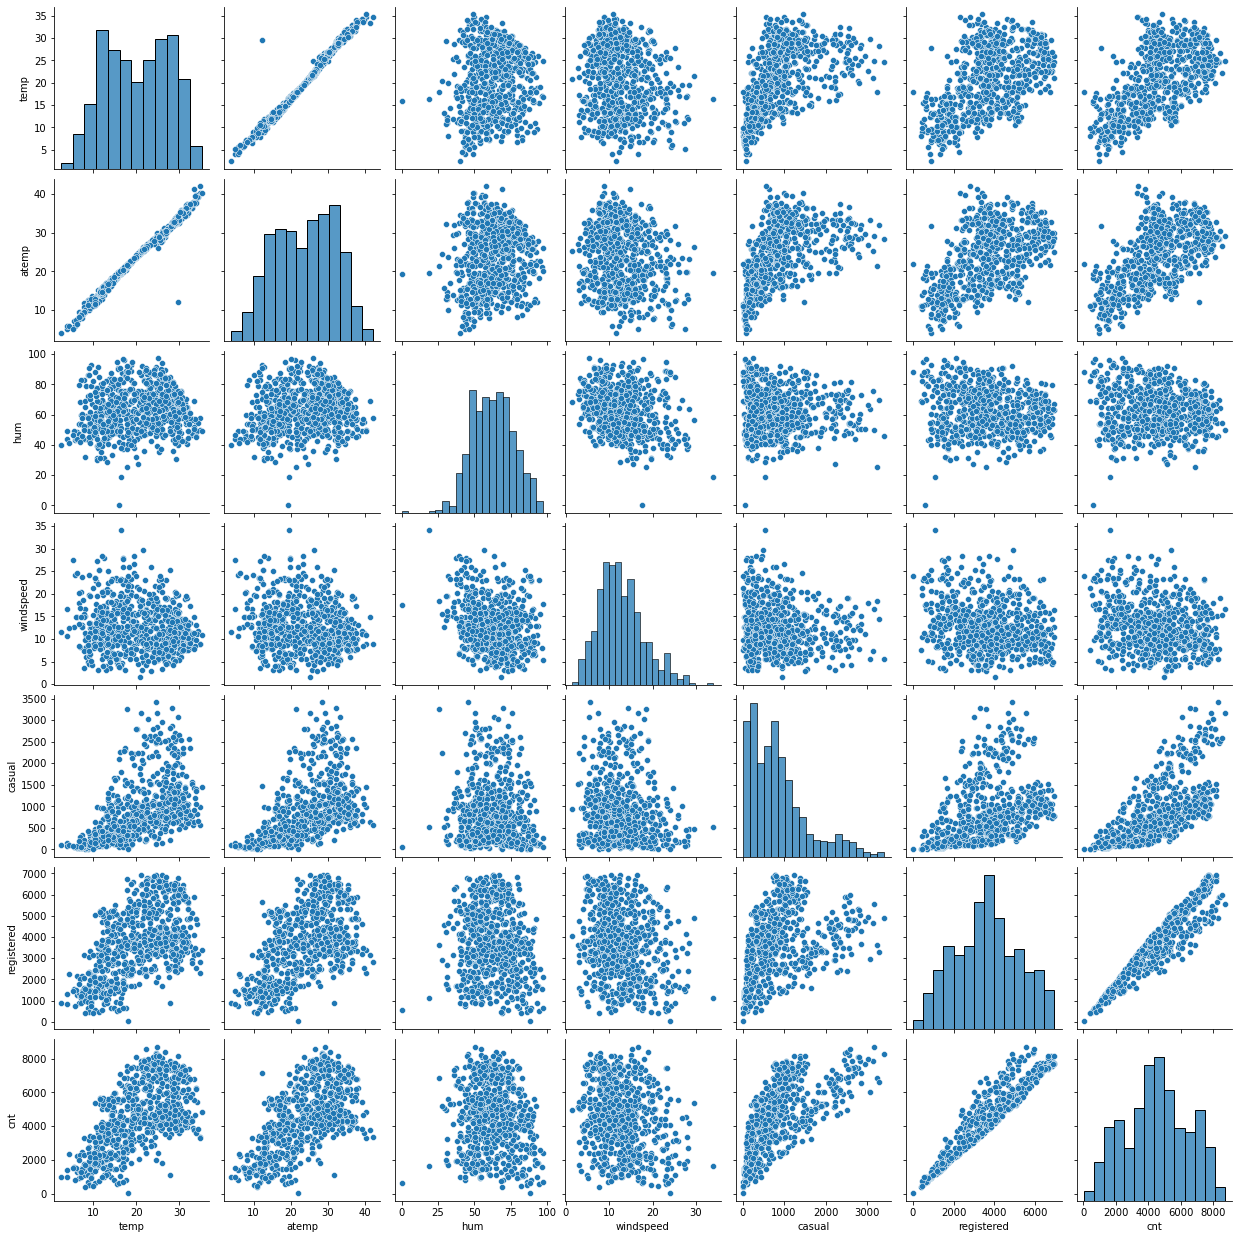

In [6]:
# plotting pair plots for all the numerical variables to check the impact on the variables

num_variables=['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(bike_data[num_variables])
plt.show()

Inferences:

Cnt variable more correlated with temperature

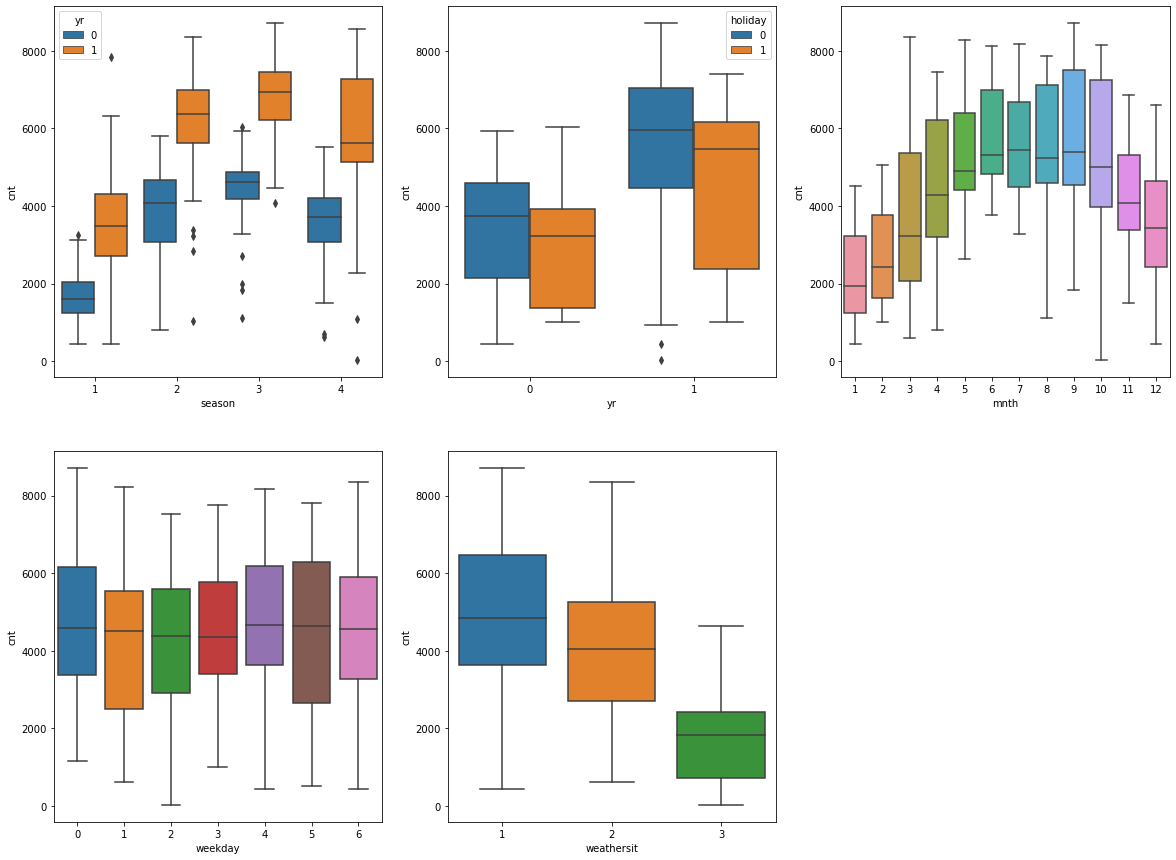

In [7]:
# plotting box Plots for categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_data,hue='yr')
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_data,hue='holiday')
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_data)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)
plt.show()

Inferences:

1.) Season 3,4 have compartively more number of users than season1

2.) Year 2019 the users have increased as compared to previous year

3.) In clear weather more users and  in Light Snow less number of users

In [8]:
#Mapping variables

bike_data['season']=bike_data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_data['mnth']=bike_data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weathersit']=bike_data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_data['weekday']=bike_data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


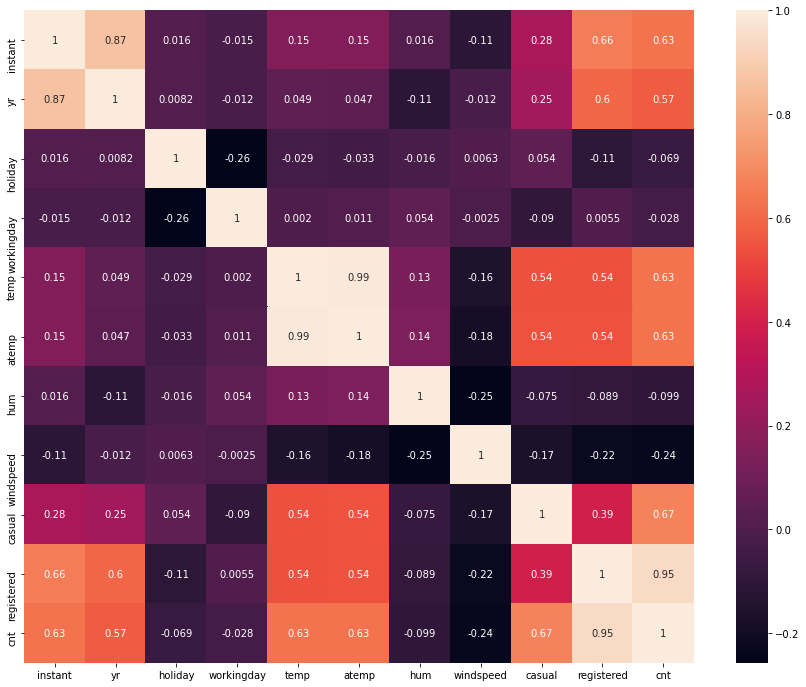

In [9]:
# plotting a heatmap to see the correlation between varibales

plt.figure(figsize=(15, 12))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

Variables showing correlation with target variable "cnt"

1.) registered
2.) casual
3.) temp
4.) yr
5.) season
6.) mnth

In [10]:
# Dropping unnecessary columns from dataset
bike_data.drop(columns=['instant','dteday','casual', 'registered','atemp'], inplace=True)

In [11]:
#checking the shape of the data

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [12]:
#checking the datatype

bike_data.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

# Data Preparation for Regression Analysis

In [13]:
# creating dummy variables for categorical columns
# creating n-1 dummy variables for n levels
# Not creating dummy variable for yr,holiday,workingday as they are already in binary format

month=pd.get_dummies(bike_data.mnth, drop_first=True)
week_day=pd.get_dummies(bike_data.weekday, drop_first=True)
weather=pd.get_dummies(bike_data.weathersit, drop_first=True)
seasons=pd.get_dummies(bike_data.season, drop_first=True)



In [14]:
#concatenating all the columns

bike_data=pd.concat([month,week_day,weather,seasons,bike_data], axis=1)
bike_data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [15]:
# Dropping unnecessary categorical columns from dataset as we have created the dummy variables

bike_data.drop(columns=['season','weathersit','mnth','weekday'], inplace=True)

In [16]:
bike_data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [17]:
bike_data.shape

(730, 29)

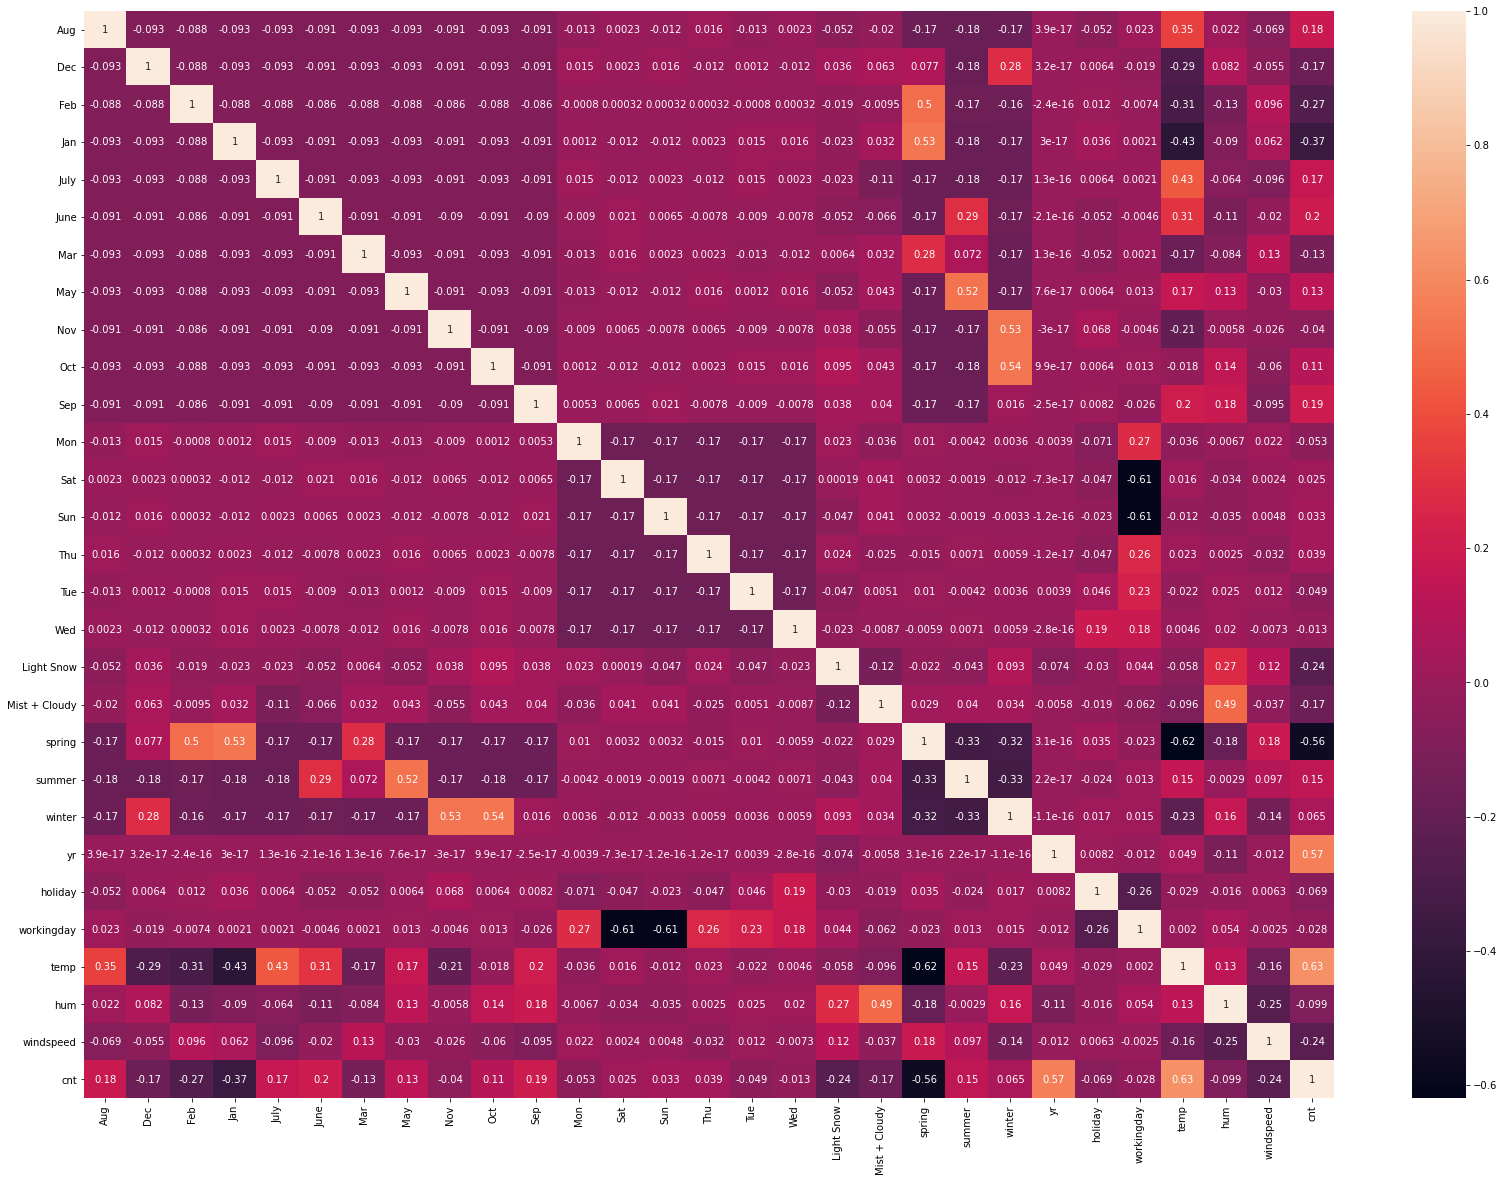

In [18]:
#checking the correlation between variable again

plt.figure(figsize=(28, 20))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

Variables having strong correlation

temperature,registered, yr,Summer season are having good correlation with the 'cnt' variable

# Splitting Data into train and test data

In [19]:
#splitting data into 70-30 ratio(training:test)

from sklearn.model_selection import train_test_split

np.random.seed(0)
bikedata_train, bikedata_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)

In [20]:
# checking the no. of rows and columns after split
print(bikedata_train.shape)
print(bikedata_test.shape)

(510, 29)
(220, 29)


# Rescaling the variable

In [21]:
# Min-max scaling importing libraries

from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

num_columns=['temp','hum','windspeed','cnt']

bikedata_train[num_columns] = scaler.fit_transform(bikedata_train[num_columns])
bikedata_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [23]:
#Checking the statistical information

bikedata_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


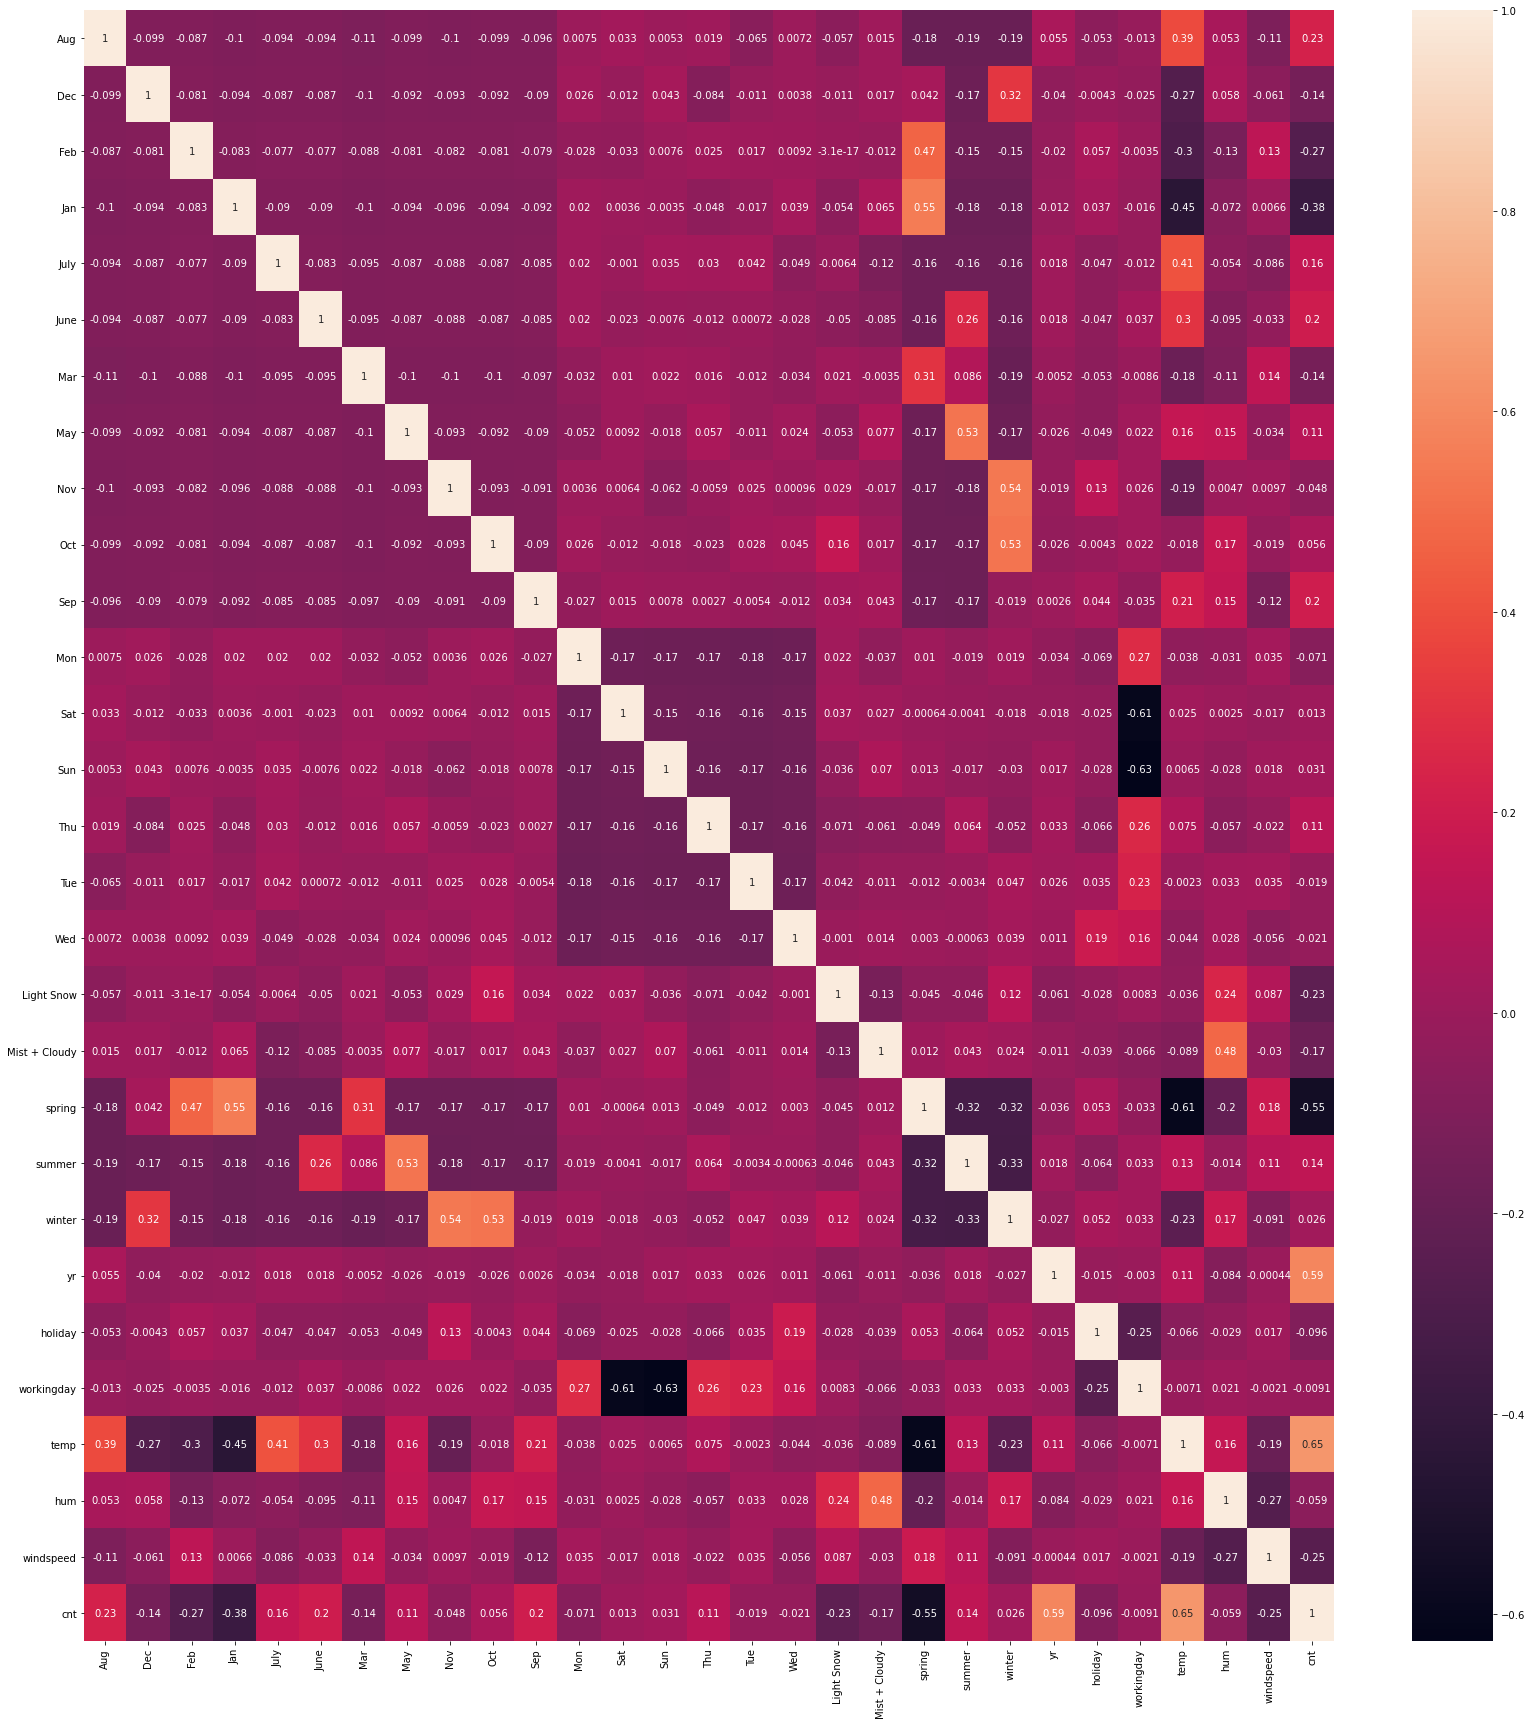

In [24]:
#checking the correlation between variables after rescaling

plt.figure(figsize=(28, 30))
sns.heatmap(bikedata_train.corr(),annot = True)
plt.show()

Inferences:

1.) yr,temp, august, september strong correlation

# Dividing the training data into X axis and Y axis

In [25]:
y_train = bikedata_train.pop('cnt')
X_train = bikedata_train

In [26]:
#checking the dataset

y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [27]:
#checking the dataset

X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981


# Model Building

In [28]:
#importing libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [30]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [31]:
#list of Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [32]:
X_train_rfe = X_train[col]

In [33]:
# Adding a constant variable 
# importing statsmodel library

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Model 1

In [34]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          8.15e-189
Time:                        22:24:52   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
yr                0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
hum              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [37]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,yr,2.09
3,Nov,1.85
1,Jan,1.75


# Model 2

In [38]:
#dropping those variable which have high p value but low VIF
#Dropping Dec variable high P value and low VIF

X_train_n1 = X_train_rfe.drop(["Dec"], axis = 1)

In [39]:
X_train_line1 = sm.add_constant(X_train_n1)
line1 = sm.OLS(y_train,X_train_line1).fit()
print(line1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.41e-189
Time:                        22:24:52   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [40]:
#Drop the constant 
X_train_line1 = X_train_line1.drop(['const'], axis=1)

In [41]:
# calculating the VIF

vif = pd.DataFrame()
X = X_train_n1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,29.09
11,temp,16.80
13,windspeed,4.72
6,spring,4.37
8,winter,3.78
7,summer,2.80
5,Mist + Cloudy,2.29
9,yr,2.09
0,Jan,1.67
2,Nov,1.60


# Model 3

In [42]:
#dropping those variable which have high VIF (humidity variable)

X_train_n2 = X_train_line1.drop(["hum"], axis = 1)

In [43]:
X_train_line2 = sm.add_constant(X_train_n2)
line2 = sm.OLS(y_train,X_train_line2).fit()
print(line2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.93e-186
Time:                        22:24:52   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2208      0.031      7.190

In [44]:
#Drop the constant 
X_train_line2 = X_train_line2.drop(['const'], axis=1)

In [45]:
# calculating the VIF

vif = pd.DataFrame()
X = X_train_n2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.15
12,windspeed,4.67
6,spring,2.76
8,winter,2.28
7,summer,2.24
9,yr,2.07
0,Jan,1.61
2,Nov,1.60
1,July,1.59
5,Mist + Cloudy,1.56


# Model 4

In [46]:
#dropping those variable which have high p value but low VIF
#Dropping nov variable high P value and low VIF

X_train_n3 = X_train_line2.drop(["Nov"], axis = 1)

In [47]:
X_train_line3 = sm.add_constant(X_train_n3)
line3 = sm.OLS(y_train,X_train_line3).fit()
print(line3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          8.14e-187
Time:                        22:24:52   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [48]:
#Drop the constant 
X_train_line3 = X_train_line3.drop(['const'], axis=1)

In [49]:
# calculating the VIF

vif = pd.DataFrame()
X = X_train_n3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.62
5,spring,2.75
6,summer,2.24
8,yr,2.07
7,winter,1.78
0,Jan,1.61
1,July,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


# Model 5

In [50]:
#dropping those variable which have high VIF(windspeed) and also it has negative correlation with the target variable

X_train_n4 = X_train_line3.drop(["windspeed"], axis = 1)

In [51]:
X_train_line4 = sm.add_constant(X_train_n4)
line4 = sm.OLS(y_train,X_train_line4).fit()
print(line4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.83e-180
Time:                        22:24:52   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1586      0.030      5.289

In [52]:
#Drop the constant 
X_train_line4 = X_train_line4.drop(['const'], axis=1)

In [53]:
# calculating the VIF

vif = pd.DataFrame()
X = X_train_n4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.28
8,yr,2.07
5,spring,1.99
6,summer,1.94
0,Jan,1.60
1,July,1.59
7,winter,1.57
4,Mist + Cloudy,1.56
2,Sep,1.34
3,Light Snow,1.07


# Model 6

In [54]:
#dropping those variable which have high p value but low VIF
#Dropping jan variable high P value and low VIF

X_train_n5 = X_train_line4.drop(["Jan"], axis = 1)

In [55]:
X_train_line5 = sm.add_constant(X_train_n5)
line5 = sm.OLS(y_train,X_train_line5).fit()
print(line5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.71e-181
Time:                        22:24:52   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124

In [56]:
#Drop the constant 
X_train_line5 = X_train_line5.drop(['const'], axis=1)

In [57]:
# calculating the VIF

vif = pd.DataFrame()
X = X_train_n5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.22
7,yr,2.06
5,summer,1.94
0,July,1.58
6,winter,1.57
3,Mist + Cloudy,1.55
4,spring,1.40
1,Sep,1.34
2,Light Snow,1.07
8,holiday,1.04


# Model 7

In [58]:
#dropping those variable which have high p value but low VIF
#Dropping summer variable high P value and low VIF

X_train_n6 = X_train_line5.drop(["summer"], axis = 1)

In [59]:
X_train_line6 = sm.add_constant(X_train_n6)
line6 = sm.OLS(y_train,X_train_line6).fit()
print(line6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.25e-181
Time:                        22:24:52   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1952      0.022      8.802

In [60]:
#Drop the constant 
X_train_line6 = X_train_line6.drop(['const'], axis=1)

In [61]:
# calculating the VIF

vif = pd.DataFrame()
X = X_train_n6

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,2.99
6,yr,2.05
3,Mist + Cloudy,1.51
0,July,1.33
5,winter,1.33
4,spring,1.25
1,Sep,1.19
2,Light Snow,1.06
7,holiday,1.04


# Model 7 is our final model as we can see the R2 is more than 80% , p value < 0.05, VIF < 5 , AdjustedR2 >80%

# Plotting the error terms

In [62]:
X_train_line6=sm.add_constant(X_train_line6)
X_train_line6

,const,July,Sep,Light Snow,Mist + Cloudy,spring,winter,yr,holiday,temp
576,1.0,1,0,0,0,0,0,1,0,0.815169
426,1.0,0,0,0,1,1,0,1,0,0.442393
728,1.0,0,0,0,0,1,0,1,0,0.245101
482,1.0,0,0,0,1,0,0,1,0,0.395666
111,1.0,0,0,0,1,0,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0,0.863973
53,1.0,0,0,0,0,1,0,0,0,0.202618
350,1.0,0,0,0,1,0,1,0,0,0.248216
79,1.0,0,0,0,1,0,0,0,0,0.462664


In [63]:
y_train_predicted = line6.predict(X_train_line6)

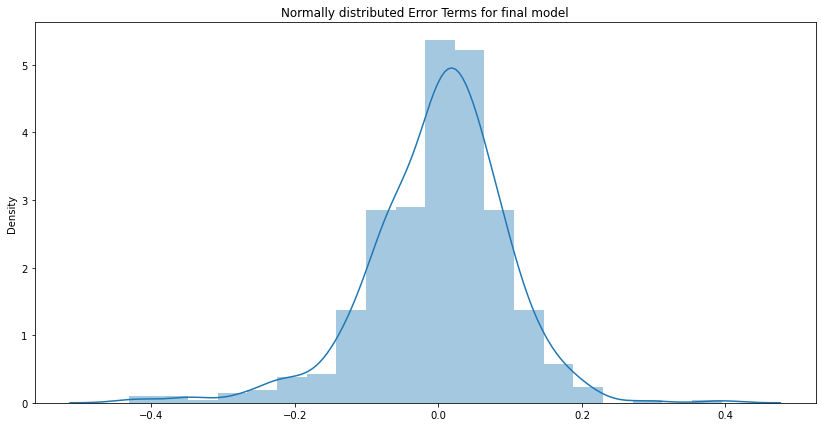

In [64]:
# Plot the histogram of the error terms

plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_predicted), bins = 20)
plt.title('Normally distributed Error Terms for final model')
plt.show()

Errors are normally distributed

Text(0, 0.5, 'Residuals')

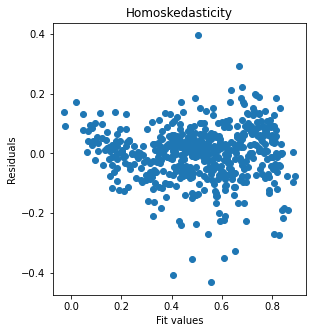

In [65]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Homoskedasticity")
plt.scatter(y_train_predicted, (y_train-y_train_predicted))
plt.xlabel("Fit values")
plt.ylabel("Residuals")

No funnel shaped formed

# Applying scaling on test data set

In [66]:
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bikedata_test[num_vars] = scaler.transform(bikedata_test[num_vars])
bikedata_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [67]:
#Dividing into X_test and y_test
y_test = bikedata_test.pop('cnt')
X_test = bikedata_test


In [68]:
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [69]:
X_train_n6.columns

Index(['July', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'winter', 'yr',
       'holiday', 'temp'],
      dtype='object')

In [70]:
X_test_new = X_test[X_train_n6.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Light Snow,Mist + Cloudy,spring,winter,yr,holiday,temp
184,1.0,1,0,0,1,0,0,0,1,0.831783
535,1.0,0,0,0,0,0,0,1,0,0.901354
299,1.0,0,0,0,1,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,0,0,0.817246


In [71]:
# Making predictions
y_pred = line6.predict(X_test_new1)

# Finding R-squared and Adjusted R-Squared for Test set

In [72]:
#Evaluate R-square for test

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8096078487662723

# Model Evaluation

# Checking the linear relationship bewteen target and feature variables

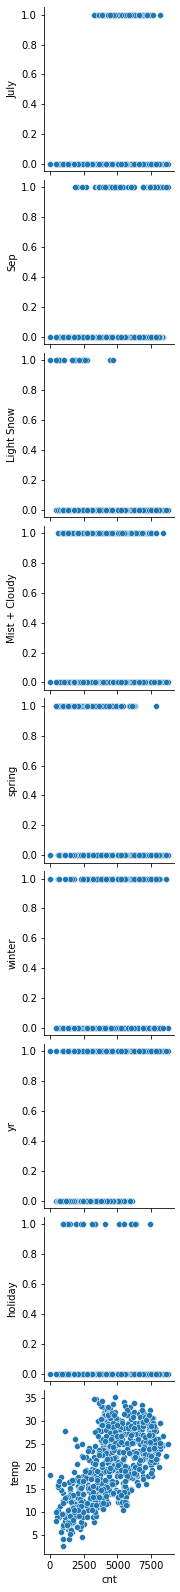

<Figure size 1440x1080 with 0 Axes>

In [73]:
sns.pairplot(bike_data, y_vars=X_train_n6.columns, x_vars='cnt')
plt.figure(figsize = (20, 15))
plt.show()

Temperature has a clear linear relationship with cnt(target variable)

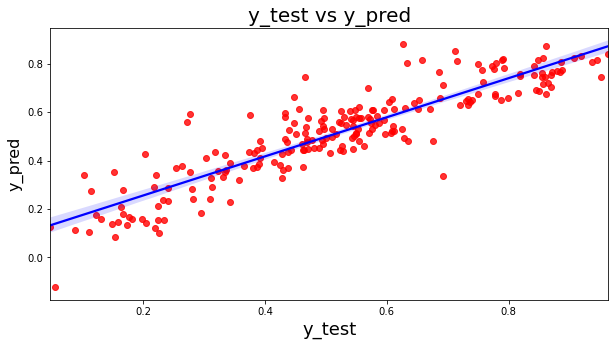

In [74]:
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred,fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.title('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

Equation of best fit line : 

cnt = 0.4695*temp + 0.2332*yr -0.1006*holiday + 0.0534*winter -0.1122*spring -0.0781*MIst +Cloudy - 0.2993*Light Snow + 0.654*Sep -0.0690*July

# Final Result Comparison between Train model and Test:

Train R2 : 0.822
    
Train Adjusted R3 : 0.819

Test R2 : 0.809


# Observations

1.) We can see that temperature variable is having the highest coefficient 0.4695, which means if the temperature increases by one unit the number of bike rentals increases by 0.4695 units

2.) US bike-sharing provider BoomBikes can focus more on Temperature

3.) There are some variables with negative coefficients also which means if the independent variable increases the dependent varibale decreases ex. spring, holiday, mist + cloudy etc.

4.) Demand has increased in year 2019 as compare to 2018

5.) Can focus on working days and during fall season the number of bike users are more